In [36]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

def compute_mean(dataset):
#     sum_ = 0
#     for element in data:
#         sum_ += element
#     sum_ = sum_ / len(dataset)
    result = sum(dataset) / len(dataset)
    return result

compute_mean(data)

4.391304347826087

In [7]:
np.mean(data)

4.391304347826087

In [14]:
def compute_median(dataset):
    ordered = sorted(dataset)
    result = 0
    if len(ordered) < 1:
        return 0
    elif len(ordered) % 2 == 0:
        first = math.floor(len(ordered) / 2)
        second = first + 1
        result = (ordered[first] + ordered[second]) / 2
    else:
        middle = math.ceil(len(ordered) / 2)
        result = ordered[middle]
    return result

compute_median(data)

4

In [12]:
np.median(data)

4.0

In [31]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

def compute_mode(dataset):
    count_map = {}
    for element in dataset:
        if element not in count_map:
            count_map[element] = 1
        else:
            count_map[element] += 1
    winner = [0, 0]
    for key, value in count_map.items():
        if value > winner[1]:
            winner = [key, value]
    return winner[0]

compute_mode(data)

3

In [23]:
stats.mode(data).mode[0]

3

In [33]:
df = pd.read_csv('../Notebooks/Datasets/titanic.csv')

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
ls_fare = df['Fare'].dropna().values

In [38]:
np.mean(ls_fare)

32.204207968574636

In [42]:
cheap_fares = [i for i in ls_fare if i < np.mean(ls_fare)]

In [46]:
len(cheap_fares)

680

In [47]:
len(cheap_fares) / len(ls_fare)

0.7631874298540965

In [48]:
np.median(ls_fare)

14.4542

In [49]:
below_median = df[df['Fare'] <= np.median(ls_fare)]

In [53]:
len(below_median)

447

In [52]:
len(below_median) / len(ls_fare)

0.5016835016835017

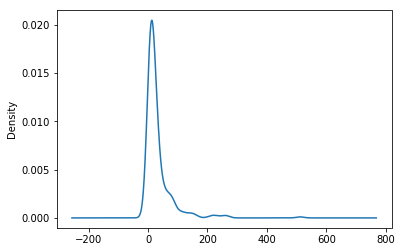

In [57]:
df['Fare'].plot(kind="kde")

In [59]:
def compute_range(dataset):
    return max(dataset) - min(dataset)

compute_range(data)

10

In [69]:
from functools import reduce

def standard_deviation(dataset):
    # denominator: sum of difference between all numbers and the mean
    mean = compute_mean(dataset)
    denom = reduce((lambda accum, value: accum + pow((value - mean), 2)), dataset, 0)
    # numerator: number of values in dataset
    numer = len(dataset)
    std_dev = pow((denom / numer), 0.5)
    return std_dev

standard_deviation(data)

3.074992123493378

In [61]:
np.std(data)

3.074992123493378

In [70]:
np.percentile(ls_fare, 75)

31.0

In [71]:
numbers_below_percentile = df[df['Fare'] <= 31.0]

In [73]:
len(numbers_below_percentile) / len(ls_fare)

0.7508417508417509